In [1052]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [1053]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1054]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [1055]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602500 entries, 0 to 1602499
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1602500 non-null  int64  
 1   kWh       1602500 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.5 MB


In [1056]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1602495    0.14
1602496    0.13
1602497    0.13
1602498    0.13
1602499    0.13
Name: kWh, Length: 1602500, dtype: float64

In [1057]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1602495    0.14
1602496    0.13
1602497    0.13
1602498    0.13
1602499    0.13
Name: kWh, Length: 1602500, dtype: float64

In [1058]:
l=len(conso_data)-1
l

1602499

In [1059]:
conso_data['sec']=conso_data['Interval']/1000


In [1060]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1061]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1062]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602500 entries, 0 to 1602499
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1602500 non-null  int64  
 1   kWh        1602500 non-null  float64
 2   sec        1602500 non-null  float64
 3   Wh         1602500 non-null  float64
 4   cumul(ms)  1602500 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 61.1 MB


In [1063]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1602495,26539,0.14,26.539,135.649422,39636417817
1602496,27015,0.13,27.015,133.259300,39636444832
1602497,27253,0.13,27.253,132.095549,39636472085
1602498,27331,0.13,27.331,131.718561,39636499416
1602499,26740,0.13,26.740,134.629768,39636526156


In [1064]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

39636526156000

In [1065]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 4, 22, 328588)

In [1066]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1067]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [1068]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [1069]:
conso_data['dates']

0         2023-08-21 19:04:44.262588
1         2023-08-21 19:05:06.120588
2         2023-08-21 19:05:28.121588
3         2023-08-21 19:05:50.049588
4         2023-08-21 19:06:11.940588
                     ...            
1602495   2024-11-22 13:11:20.145588
1602496   2024-11-22 13:11:47.160588
1602497   2024-11-22 13:12:14.413588
1602498   2024-11-22 13:12:41.744588
1602499   2024-11-22 13:13:08.484588
Name: dates, Length: 1602500, dtype: datetime64[ns]

## créer les dates

In [1070]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:04:44.262588,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:05:06.120588,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:05:28.121588,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:05:50.049588,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:06:11.940588,21/08/23
...,...,...,...,...,...,...,...
1602495,26539,0.14,26.539,135.649422,39636417817,2024-11-22 13:11:20.145588,22/11/24
1602496,27015,0.13,27.015,133.259300,39636444832,2024-11-22 13:11:47.160588,22/11/24
1602497,27253,0.13,27.253,132.095549,39636472085,2024-11-22 13:12:14.413588,22/11/24
1602498,27331,0.13,27.331,131.718561,39636499416,2024-11-22 13:12:41.744588,22/11/24


### save conso_data with dates

In [1071]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [1072]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('22/11/24', 22, 11, 2024)

In [1073]:
here = now.strftime('%H:%M:%S')
here

'13:13:46'

In [1074]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1075]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1709 entries, 1600791 to 1602499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1709 non-null   int64         
 1   kWh        1709 non-null   float64       
 2   sec        1709 non-null   float64       
 3   Wh         1709 non-null   float64       
 4   cumul(ms)  1709 non-null   int64         
 5   dates      1709 non-null   datetime64[ns]
 6   days       1709 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 106.8+ KB


In [1076]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [1077]:
data = list(df_grp['kWh'])
print(data)

[0.837, 3.7, 4.231, 3.683, 4.189, 4.61, 3.521, 3.407, 3.515, 3.697, 3.774, 3.785, 4.258, 3.809, 3.459, 3.64, 3.324, 3.374, 4.295, 4.002, 4.047, 3.921, 3.442, 4.46, 3.739, 3.761, 4.38, 4.677, 3.796, 3.223, 3.179, 4.004, 3.668, 3.171, 3.792, 4.153, 3.752, 3.57, 4.784, 4.184, 4.545, 3.773, 3.405, 4.308, 3.874, 3.867, 3.435, 4.081, 3.654, 3.399, 4.135, 3.381, 3.889, 3.838, 3.641, 3.749, 4.245, 3.303, 3.87, 2.977, 2.055, 2.042, 2.456, 4.089, 3.724, 4.331, 3.619, 3.915, 3.743, 3.928, 3.98, 4.116, 3.641, 3.16, 3.803, 3.51, 3.625, 3.709, 3.685, 3.238, 3.905, 3.218, 3.789, 3.605, 4.084, 3.607, 3.344, 3.819, 4.062, 4.385, 4.08, 3.998, 4.229, 3.75, 3.923, 3.865, 3.913, 3.744, 4.043, 4.345, 3.889, 3.502, 3.683, 3.674, 3.342, 3.848, 3.994, 4.104, 3.472, 4.177, 3.606, 4.083, 4.526, 3.685, 3.428, 3.579, 4.169, 3.69, 4.082, 3.981, 3.745, 3.592, 5.129, 3.698, 3.765, 4.295, 4.1, 4.724, 4.397, 3.978, 3.783, 4.362, 4.678, 4.201, 4.788, 4.321, 3.716, 4.186, 3.706, 3.631, 3.528, 3.951, 3.669, 3.787, 3.576, 

In [1078]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1079]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1080]:
df = conso_data
len(df)

1602500

In [1081]:
period(p=2)

2023-08-22 01:10:58.065588	2023-08-22 08:15:13.685588	7h 4m 15s 	2000


In [1082]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.292674
dtype: float64

In [1083]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.483696
dtype: float64

In [1084]:
last=df_grp.iloc[-1]['kWh']
last

1.709

In [1085]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1709 entries, 1600791 to 1602499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1709 non-null   int64         
 1   kWh        1709 non-null   float64       
 2   sec        1709 non-null   float64       
 3   Wh         1709 non-null   float64       
 4   cumul(ms)  1709 non-null   int64         
 5   dates      1709 non-null   datetime64[ns]
 6   days       1709 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 106.8+ KB


In [1086]:
# select day
day = today
#day = '16/08/24'


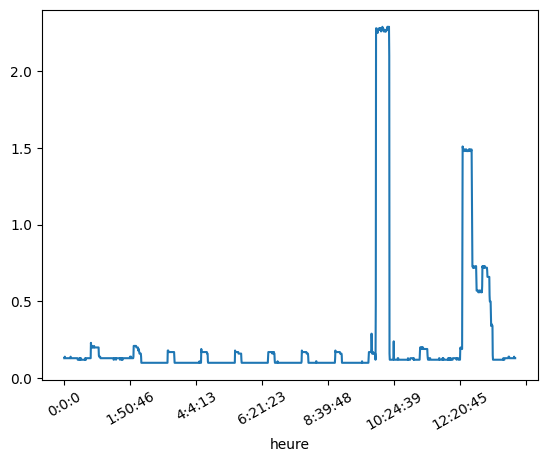

In [1087]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [1088]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:04:44.262588,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:05:06.120588,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:05:28.121588,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:05:50.049588,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:06:11.940588,21/08/23
...,...,...,...,...,...,...,...
1602495,26539,0.14,26.539,135.649422,39636417817,2024-11-22 13:11:20.145588,22/11/24
1602496,27015,0.13,27.015,133.259300,39636444832,2024-11-22 13:11:47.160588,22/11/24
1602497,27253,0.13,27.253,132.095549,39636472085,2024-11-22 13:12:14.413588,22/11/24
1602498,27331,0.13,27.331,131.718561,39636499416,2024-11-22 13:12:41.744588,22/11/24


In [1089]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:0,28100,0.13,28.100,128.113879,39588938635,2024-11-22 00:00:00.963588,22/11/24
0:0:28,27356,0.13,27.356,131.598187,39588965991,2024-11-22 00:00:28.319588,22/11/24
0:0:54,26451,0.14,26.451,136.100715,39588992442,2024-11-22 00:00:54.770588,22/11/24
0:1:21,26788,0.13,26.788,134.388532,39589019230,2024-11-22 00:01:21.558588,22/11/24
0:1:49,27506,0.13,27.506,130.880535,39589046736,2024-11-22 00:01:49.064588,22/11/24
...,...,...,...,...,...,...,...
13:11:20,26539,0.14,26.539,135.649422,39636417817,2024-11-22 13:11:20.145588,22/11/24
13:11:47,27015,0.13,27.015,133.259300,39636444832,2024-11-22 13:11:47.160588,22/11/24
13:12:14,27253,0.13,27.253,132.095549,39636472085,2024-11-22 13:12:14.413588,22/11/24


In [1090]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.572
Min : 26/10/24 3.138


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1600791,28100,0.13,28.100,128.113879,39588938635,2024-11-22 00:00:00.963588,22/11/24,0:0:0
1600792,27356,0.13,27.356,131.598187,39588965991,2024-11-22 00:00:28.319588,22/11/24,0:0:28
1600793,26451,0.14,26.451,136.100715,39588992442,2024-11-22 00:00:54.770588,22/11/24,0:0:54
1600794,26788,0.13,26.788,134.388532,39589019230,2024-11-22 00:01:21.558588,22/11/24,0:1:21
1600795,27506,0.13,27.506,130.880535,39589046736,2024-11-22 00:01:49.064588,22/11/24,0:1:49
...,...,...,...,...,...,...,...,...
1602495,26539,0.14,26.539,135.649422,39636417817,2024-11-22 13:11:20.145588,22/11/24,13:11:20
1602496,27015,0.13,27.015,133.259300,39636444832,2024-11-22 13:11:47.160588,22/11/24,13:11:47
1602497,27253,0.13,27.253,132.095549,39636472085,2024-11-22 13:12:14.413588,22/11/24,13:12:14
1602498,27331,0.13,27.331,131.718561,39636499416,2024-11-22 13:12:41.744588,22/11/24,13:12:41


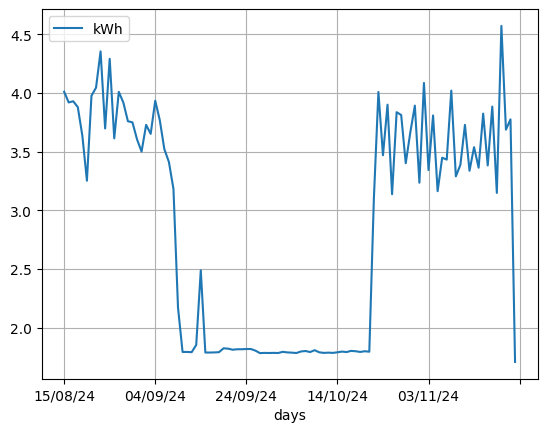

In [1091]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-22 00:00:00.963588	2024-11-22 08:39:12.163588	8h 39m 11s 	1000
2024-11-22 08:39:12.163588	2024-11-22 13:13:08.484588	4h 33m 56s 	709
<class 'pandas.core.frame.DataFrame'>
Index: 1709 entries, 1600791 to 1602499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1709 non-null   int64         
 1   kWh        1709 non-null   float64       
 2   sec        1709 non-null   float64       
 3   Wh         1709 non-null   float64       
 4   cumul(ms)  1709 non-null   int64         
 5   dates      1709 non-null   datetime64[ns]
 6   days       1709 non-null   object        
 7   heure      1709 non-null   object        
 8   hours      1709 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 133.5+ KB


('22/11/24', <Axes: xlabel='hours'>)

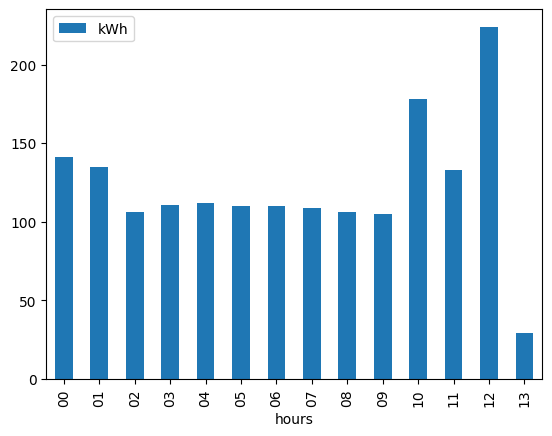

In [1092]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [1093]:
df_grp

,kWh
days,
21/08/23,0.837
22/08/23,3.700
23/08/23,4.231
24/08/23,3.683
25/08/23,4.189
...,...
18/11/24,3.149
19/11/24,4.572
20/11/24,3.688


In [1094]:
# select number of days to display
span = 30
#df_grp.tail(span)


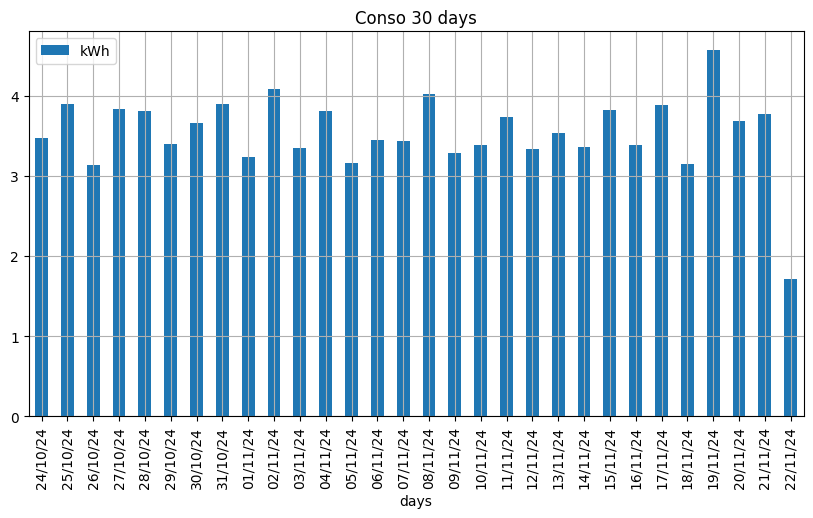

In [1095]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


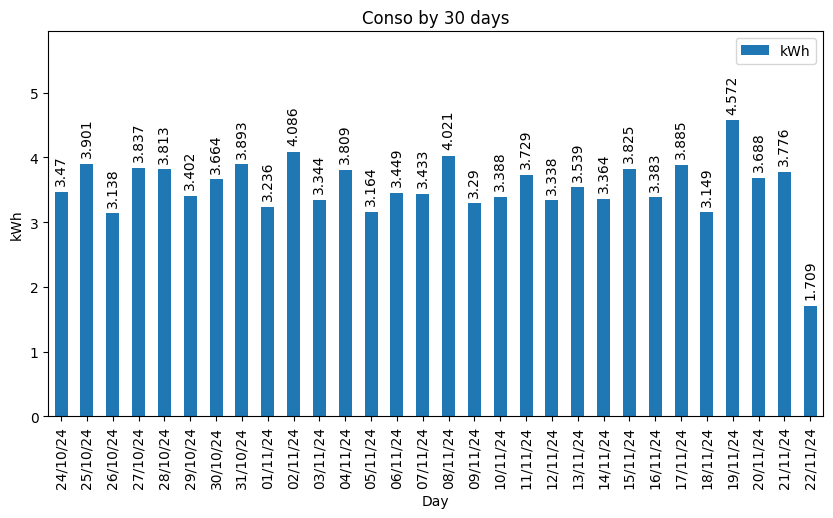

In [1096]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [1097]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
24/10/24    3.470
25/10/24    3.901
26/10/24    3.138
27/10/24    3.837
28/10/24    3.813
29/10/24    3.402
30/10/24    3.664
31/10/24    3.893
01/11/24    3.236
02/11/24    4.086
03/11/24    3.344
04/11/24    3.809
05/11/24    3.164
06/11/24    3.449
07/11/24    3.433
08/11/24    4.021
09/11/24    3.290
10/11/24    3.388
11/11/24    3.729
12/11/24    3.338
13/11/24    3.539
14/11/24    3.364
15/11/24    3.825
16/11/24    3.383
17/11/24    3.885
18/11/24    3.149
19/11/24    4.572
20/11/24    3.688
21/11/24    3.776
22/11/24    1.709
Name: kWh, dtype: float64

In [1098]:
x_labels=df_grp.tail(span).index
x_labels

Index(['24/10/24', '25/10/24', '26/10/24', '27/10/24', '28/10/24', '29/10/24',
       '30/10/24', '31/10/24', '01/11/24', '02/11/24', '03/11/24', '04/11/24',
       '05/11/24', '06/11/24', '07/11/24', '08/11/24', '09/11/24', '10/11/24',
       '11/11/24', '12/11/24', '13/11/24', '14/11/24', '15/11/24', '16/11/24',
       '17/11/24', '18/11/24', '19/11/24', '20/11/24', '21/11/24', '22/11/24'],
      dtype='object', name='days')

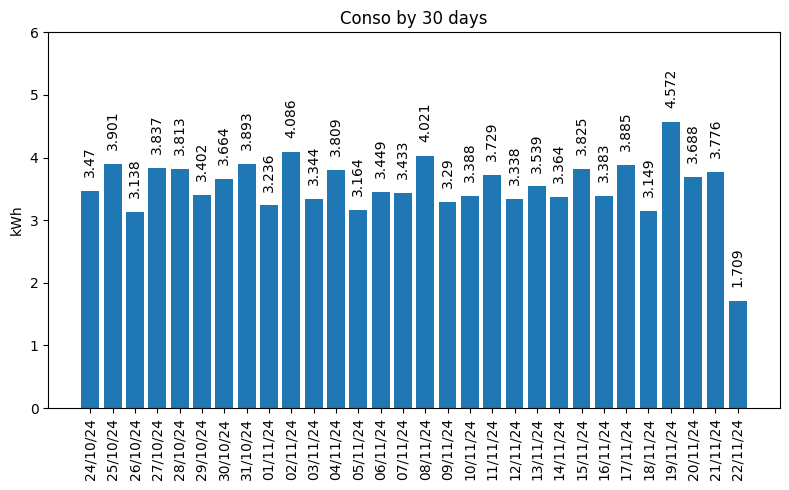

In [1099]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [1100]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

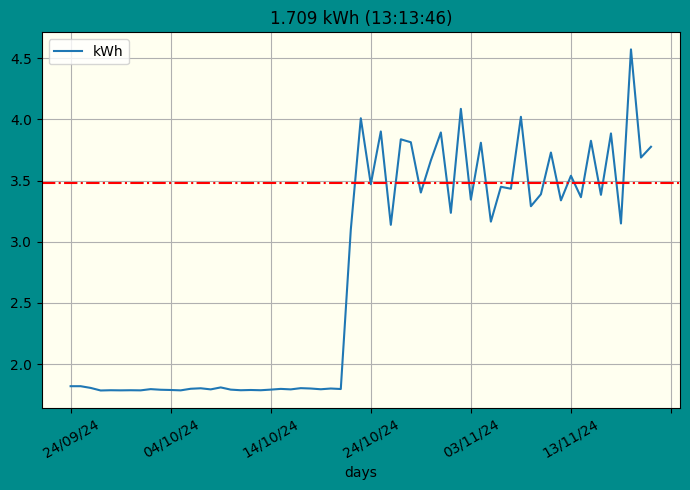

In [1101]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

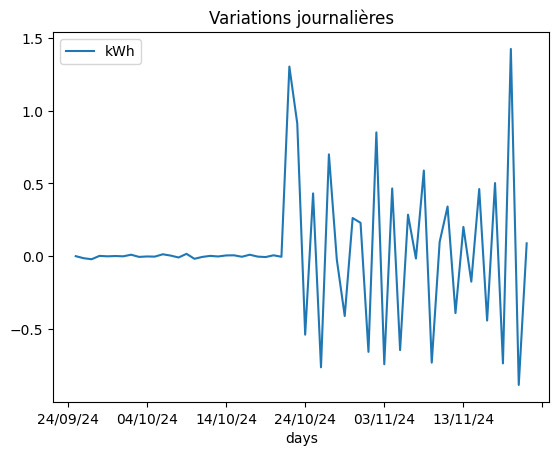

In [1102]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [1103]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:04:44.262588,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:05:06.120588,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:05:28.121588,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:05:50.049588,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:06:11.940588,21/08/23,19
...,...,...,...,...,...,...,...,...
1602495,26539,0.14,26.539,135.649422,39636417817,2024-11-22 13:11:20.145588,22/11/24,13
1602496,27015,0.13,27.015,133.259300,39636444832,2024-11-22 13:11:47.160588,22/11/24,13
1602497,27253,0.13,27.253,132.095549,39636472085,2024-11-22 13:12:14.413588,22/11/24,13
1602498,27331,0.13,27.331,131.718561,39636499416,2024-11-22 13:12:41.744588,22/11/24,13


In [1104]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [1105]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [1106]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [1107]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1108]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,837
22/08/23,3700
23/08/23,4231
24/08/23,3683
25/08/23,4189
...,...
18/11/24,3149
19/11/24,4572
20/11/24,3688


In [1109]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:04:44.262588,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:05:06.120588,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:05:28.121588,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:05:50.049588,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:06:11.940588,21/08/23,19
...,...,...,...,...,...,...,...,...
1602495,26539,0.14,26.539,135.649422,39636417817,2024-11-22 13:11:20.145588,22/11/24,13
1602496,27015,0.13,27.015,133.259300,39636444832,2024-11-22 13:11:47.160588,22/11/24,13
1602497,27253,0.13,27.253,132.095549,39636472085,2024-11-22 13:12:14.413588,22/11/24,13
1602498,27331,0.13,27.331,131.718561,39636499416,2024-11-22 13:12:41.744588,22/11/24,13


In [1110]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
22/11/24 13    1602495  22/11/24    13  0.14
               1602496  22/11/24    13  0.13
               1602497  22/11/24    13  0.13
               1602498  22/11/24    13  0.13
               1602499  22/11/24    13  0.13

[1602500 rows x 3 columns]

In [1111]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [1112]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [1113]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,837,837
22/08/23,3700,3700
23/08/23,4231,4231
24/08/23,3683,3683
25/08/23,4189,4189
...,...,...
18/11/24,3149,3149
19/11/24,4572,4572
20/11/24,3688,3688


In [1114]:
grp_by_day['kWh'].cumsum()

days
21/08/23        837
22/08/23       4537
23/08/23       8768
24/08/23      12451
25/08/23      16640
             ...   
18/11/24    1588755
19/11/24    1593327
20/11/24    1597015
21/11/24    1600791
22/11/24    1602500
Name: kWh, Length: 460, dtype: int64

In [1115]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     163
         20     284
         21     129
         22     130
         23     131
...             ...
22/11/24 09     105
         10     178
         11     133
         12     224
         13      29

[11011 rows x 1 columns]

In [1116]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19           163
          20           447
          21           576
          22           706
          23           837
                    ...   
22/11/24  09       1601936
          10       1602114
          11       1602247
          12       1602471
          13       1602500
Name: kWh, Length: 11011, dtype: int64

In [1117]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     163     163    NaN
         20     284     447  121.0
         21     129     576 -155.0
         22     130     706    1.0
         23     131     837    1.0
...             ...     ...    ...
22/11/24 09     105    1145   -1.0
         10     178    1323   73.0
         11     133    1456  -45.0
         12     224    1680   91.0
         13      29    1709 -195.0

[11011 rows x 3 columns]

In [1118]:
today, grp_by_dayhours.loc[today]

('22/11/24',
        kWh  cumsum   diff
 hours                    
 00     141     141    NaN
 01     135     276   -6.0
 02     106     382  -29.0
 03     111     493    5.0
 04     112     605    1.0
 05     110     715   -2.0
 06     110     825    0.0
 07     109     934   -1.0
 08     106    1040   -3.0
 09     105    1145   -1.0
 10     178    1323   73.0
 11     133    1456  -45.0
 12     224    1680   91.0
 13      29    1709 -195.0)

Text(0.5, 1.0, 'Cumul journalier')

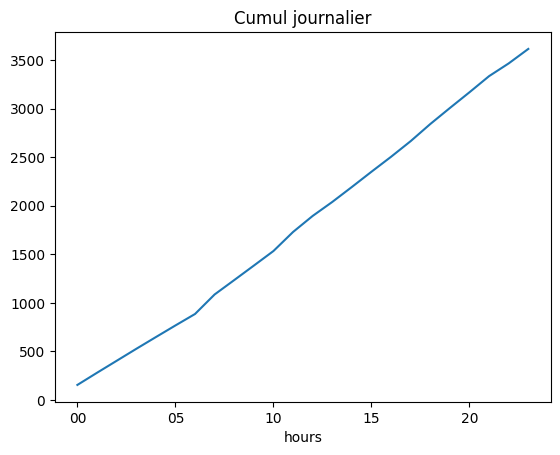

In [1119]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

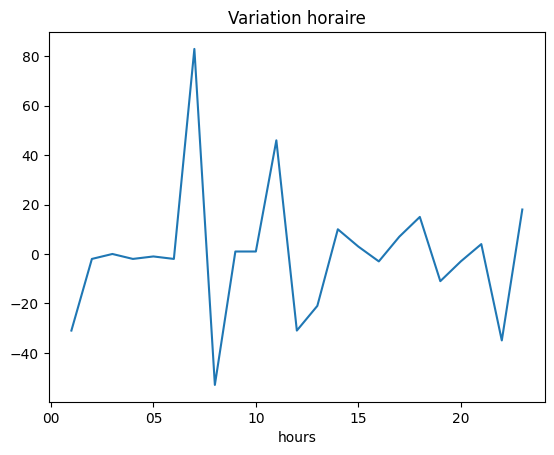

In [1120]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [1121]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

460

In [1122]:
df_grp.tail(n)['kWh'].describe()


count    460.000000
mean       3.483696
std        0.708744
min        0.837000
25%        3.341000
50%        3.617500
75%        3.877000
max        5.129000
Name: kWh, dtype: float64

In [1123]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '460 days')

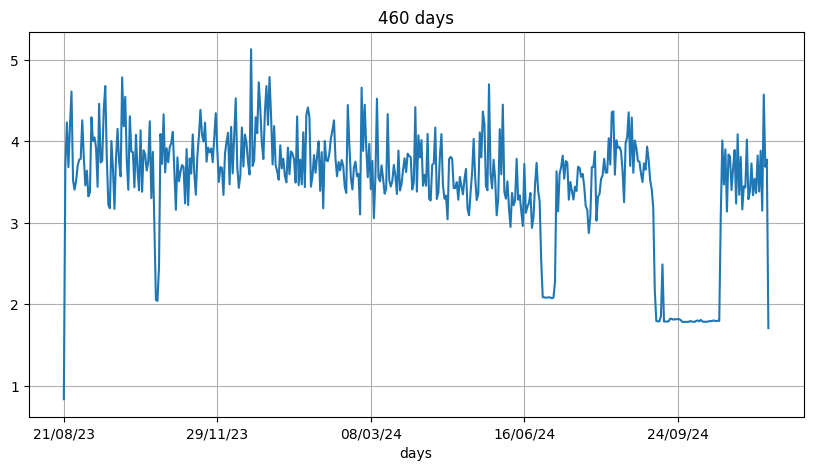

In [1124]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

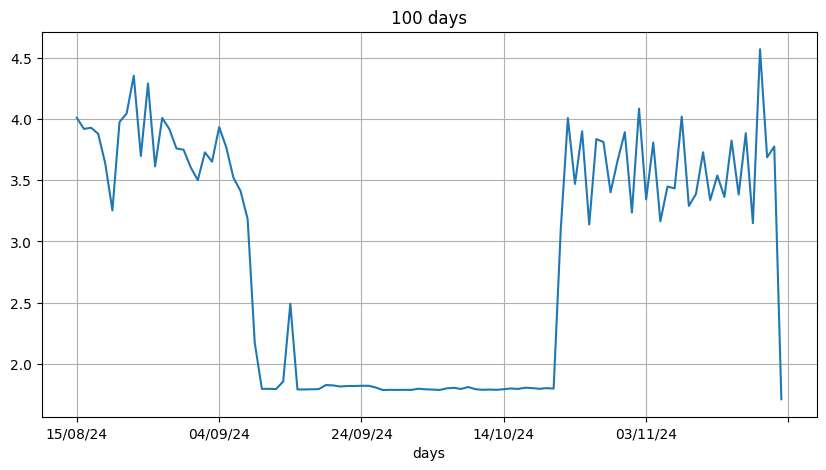

In [1125]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1126]:
df_grp['kWh']

days
21/08/23    0.837
22/08/23    3.700
23/08/23    4.231
24/08/23    3.683
25/08/23    4.189
            ...  
18/11/24    3.149
19/11/24    4.572
20/11/24    3.688
21/11/24    3.776
22/11/24    1.709
Name: kWh, Length: 460, dtype: float64

In [1127]:
df_grp.describe()

,kWh
count,460.000000
mean,3.483696
std,0.708744
min,0.837000
25%,3.341000
50%,3.617500
75%,3.877000
max,5.129000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

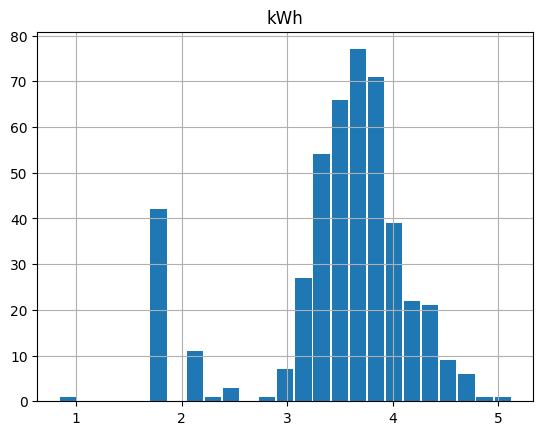

In [1128]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [1129]:
df_grp.tail(span)['kWh']

days
15/08/24    4.011
16/08/24    3.920
17/08/24    3.930
18/08/24    3.880
19/08/24    3.636
            ...  
18/11/24    3.149
19/11/24    4.572
20/11/24    3.688
21/11/24    3.776
22/11/24    1.709
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [1130]:
day

'22/11/24'

In [1131]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,141,141,NaN
01,135,276,-6.0
02,106,382,-29.0
03,111,493,5.0
04,112,605,1.0
05,110,715,-2.0
06,110,825,0.0
07,109,934,-1.0
08,106,1040,-3.0


In [1132]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


14

In [1133]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 15)

In [1134]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [1135]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [1136]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
Name: days, dtype: float64

In [1137]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [1138]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 00 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     14 non-null     int64  
 1   cumsum  14 non-null     int64  
 2   diff    13 non-null     float64
 3   days    14 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 560.0+ bytes


In [1139]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
Name: days, dtype: float64

In [1140]:
day

'22/11/24'

In [1141]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,141,141,NaN,1.0
01,135,276,-6.0,2.0
02,106,382,-29.0,3.0
03,111,493,5.0,4.0
04,112,605,1.0,5.0
05,110,715,-2.0,6.0
06,110,825,0.0,7.0
07,109,934,-1.0,8.0
08,106,1040,-3.0,9.0


Text(0.5, 1.0, '22/11/24')

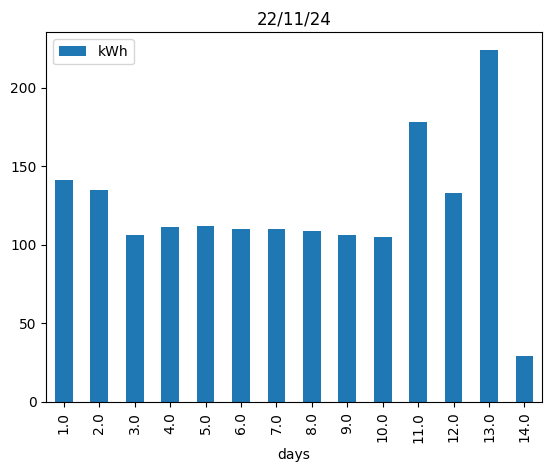

In [1142]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [1143]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13'],
      dtype='object', name='hours')

# Conso du jour


In [1144]:
groupedbyhour.count()

,kWh
hours,
00,141
01,135
02,106
03,111
04,112
05,110
06,110
07,109
08,106


In [1145]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    167
01    151
02    169
03    166
04    146
05    136
06    119
07    126
08    131
09    114
10    131
11    125
12    175
13    156
14    138
15    157
16    986
17    230
18    293
19    291
20    316
21    326
22    201
23    179
Name: kWh, dtype: int64

In [1146]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

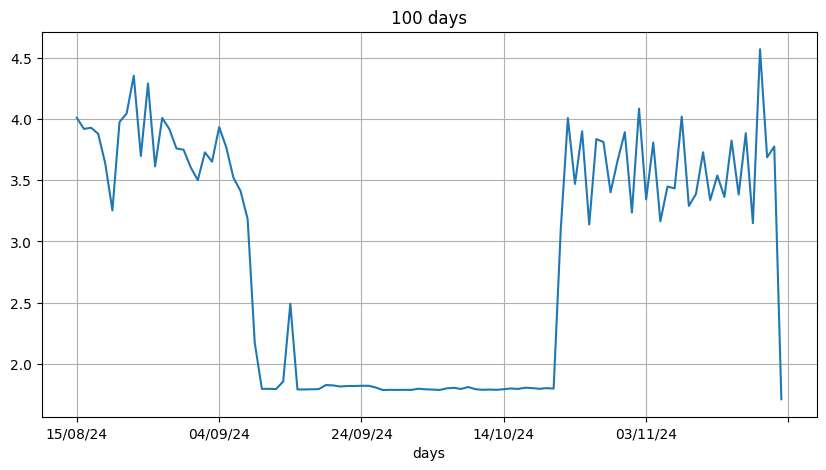

In [1147]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1148]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

96.40987038612366


# Today

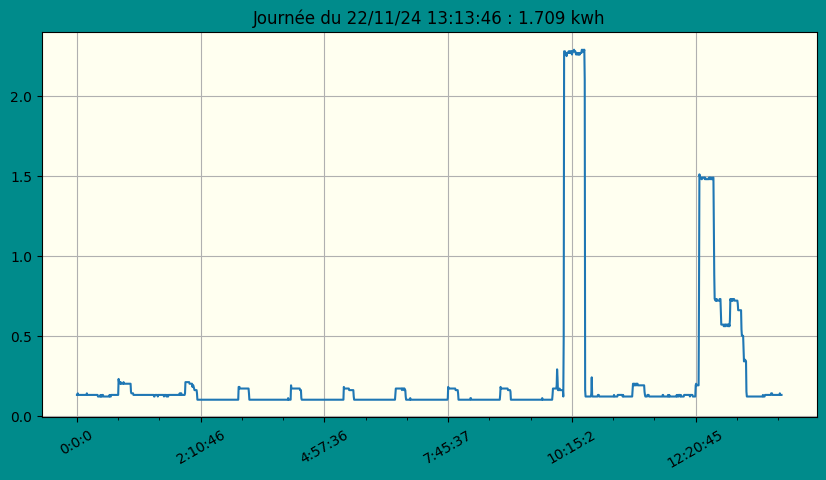

In [1149]:
show(today,bgcolor='ivory')

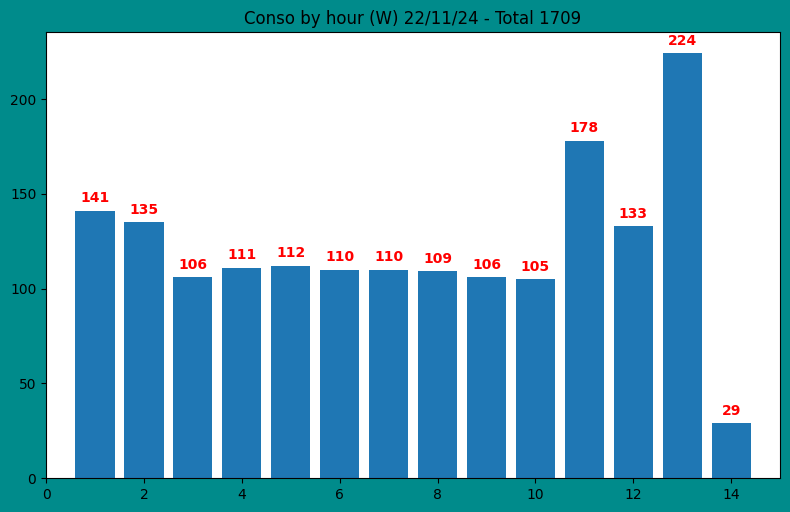

In [1150]:
conso_by_hour(today)

In [1181]:
day = '21/11/24'

('21/11/24', None)

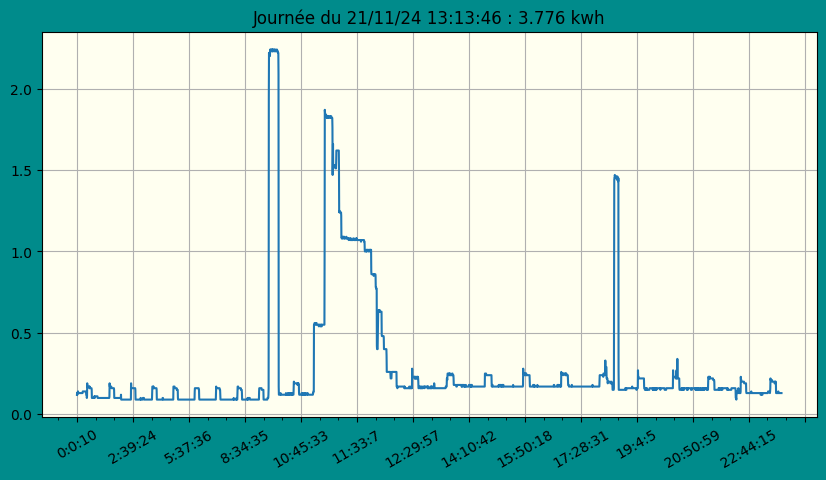

In [1182]:
day, show(day,bgcolor='ivory')

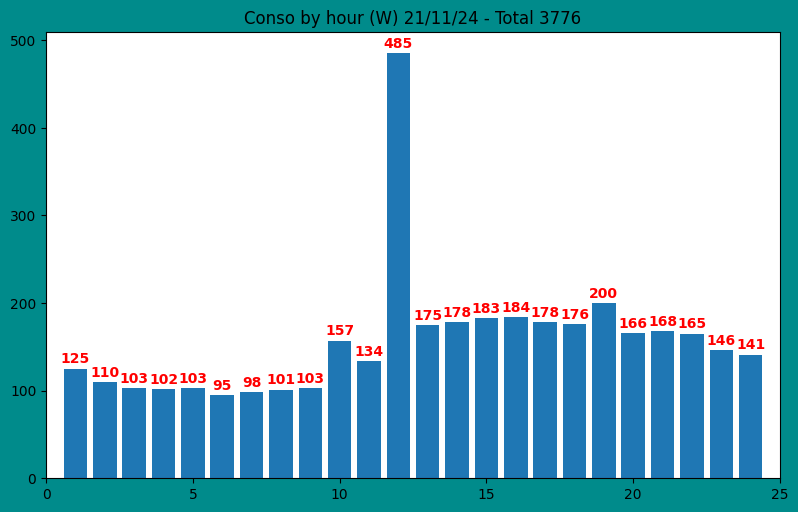

In [1183]:
conso_by_hour(day)

('21/12/23', None)

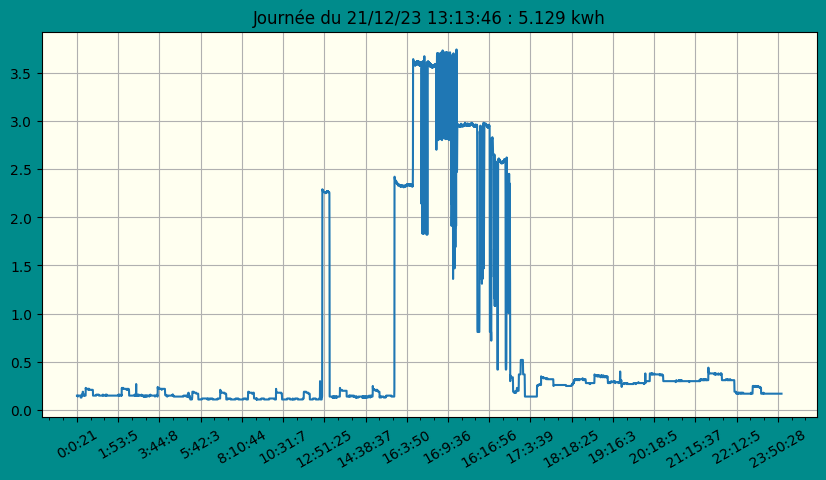

In [1184]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

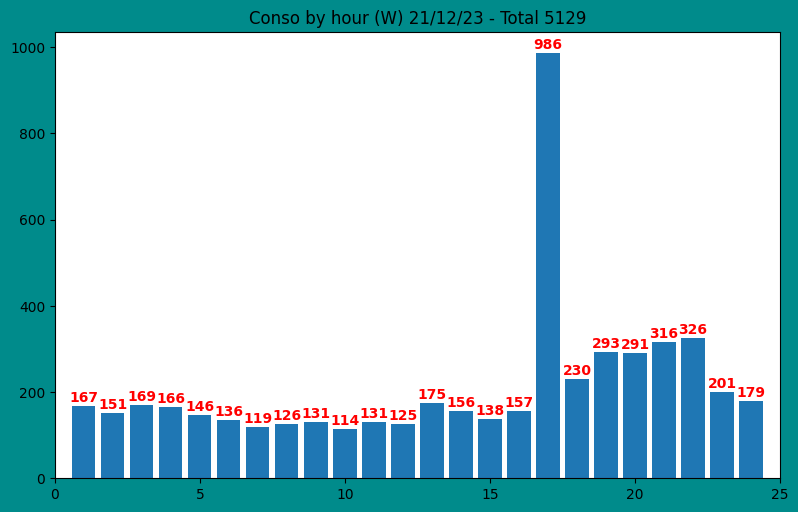

In [1185]:
conso_by_hour(day)

In [1186]:
sum(data)

5129

In [1187]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,141,141,NaN,1.0
01,135,276,-6.0,2.0
02,106,382,-29.0,3.0
03,111,493,5.0,4.0
04,112,605,1.0,5.0
05,110,715,-2.0,6.0
06,110,825,0.0,7.0
07,109,934,-1.0,8.0
08,106,1040,-3.0,9.0


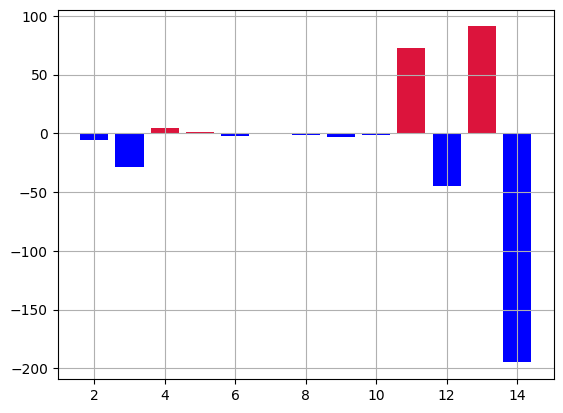

In [1188]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [1189]:
data

hours
00    167
01    151
02    169
03    166
04    146
05    136
06    119
07    126
08    131
09    114
10    131
11    125
12    175
13    156
14    138
15    157
16    986
17    230
18    293
19    291
20    316
21    326
22    201
23    179
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

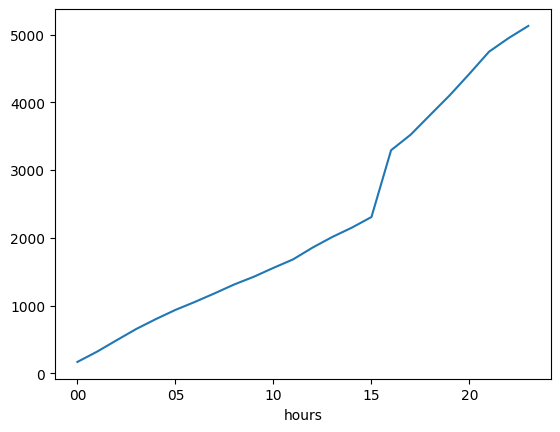

In [1190]:
data.cumsum().plot()


<Axes: xlabel='hours'>

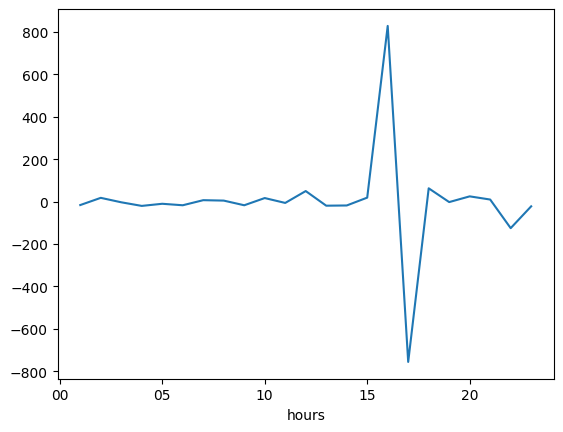

In [1191]:
# evolution par heure
data.diff().plot()

In [1192]:
data.diff().describe()

count     23.000000
mean       0.521739
std      241.697570
min     -756.000000
25%      -17.500000
50%       -3.000000
75%       17.500000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

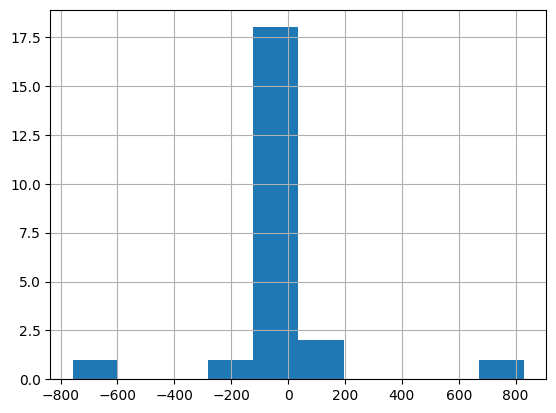

In [1193]:
data.diff().hist()

# Test sauvegarde

In [1194]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [1195]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1196]:
#conso_byhour(day)

In [1197]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


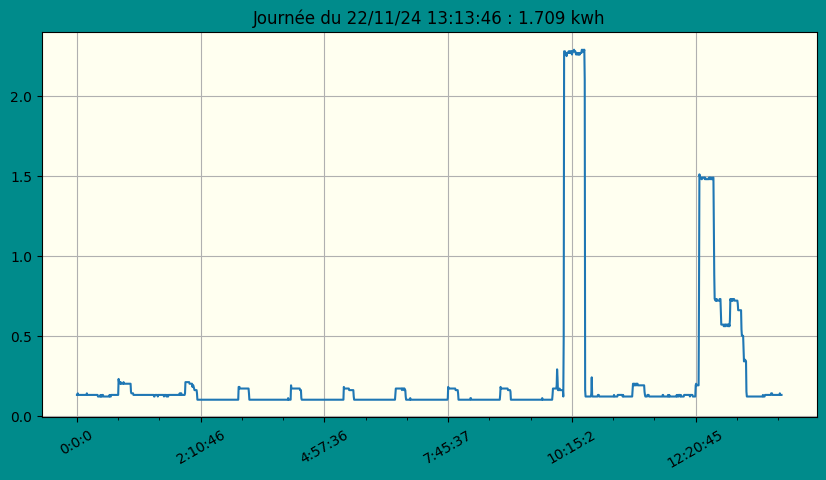

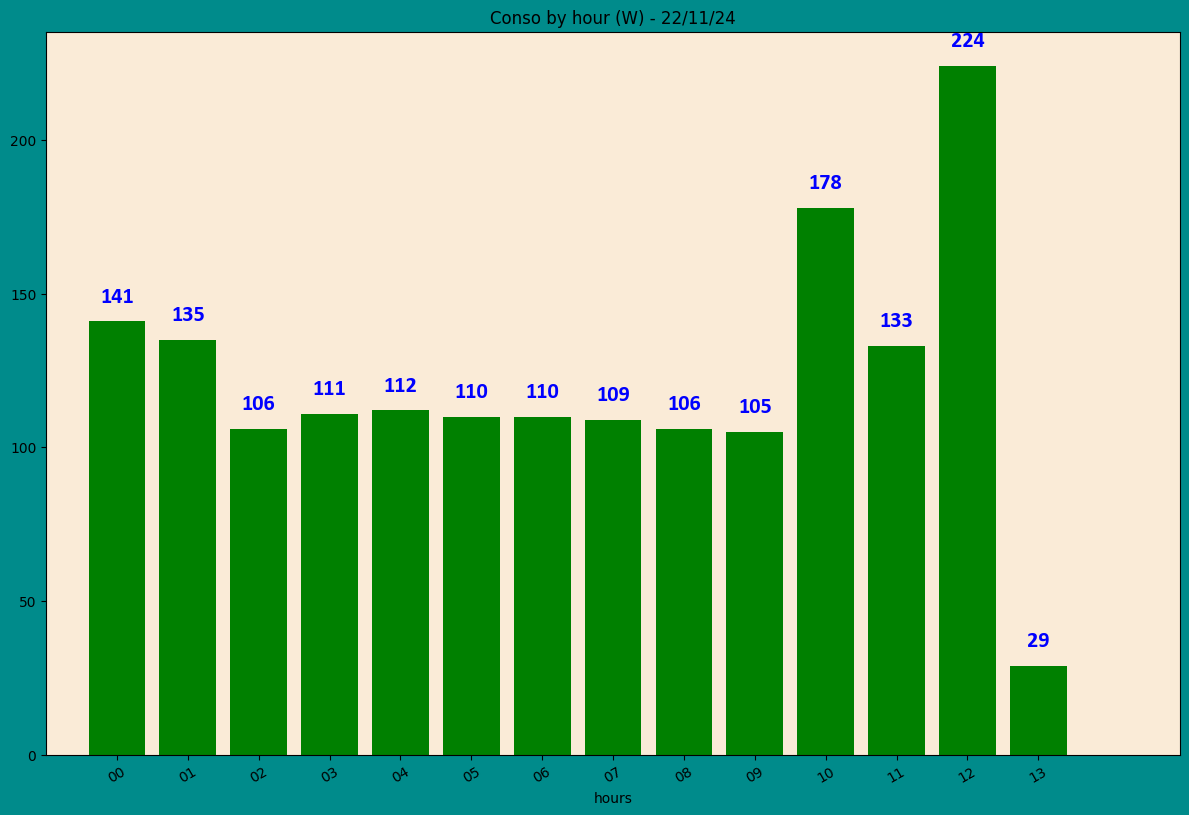

In [1198]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1199]:
month.describe()


count    30.000000
mean      3.619833
std       0.335006
min       3.138000
25%       3.368750
50%       3.601500
75%       3.834000
max       4.572000
Name: kWh, dtype: float64

<Axes: >

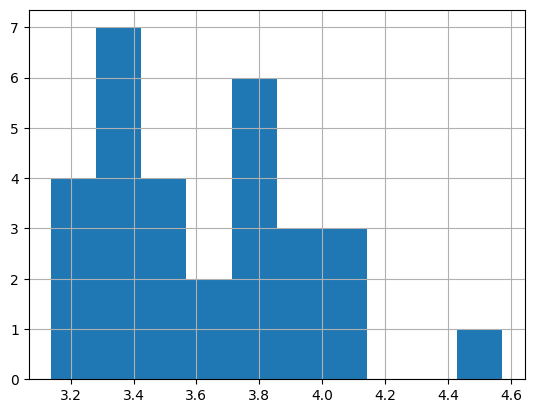

In [1200]:
month.hist()

<Axes: xlabel='days'>

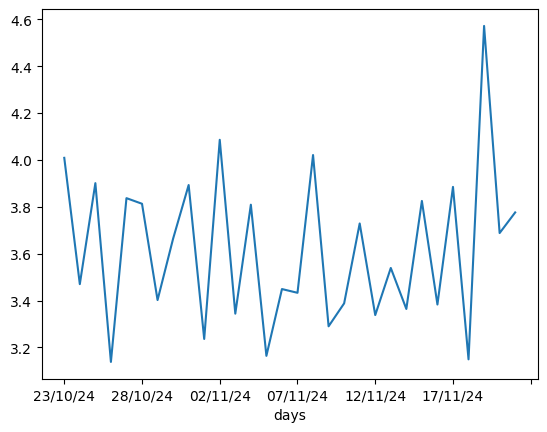

In [1201]:
month.plot()

In [1202]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [1203]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

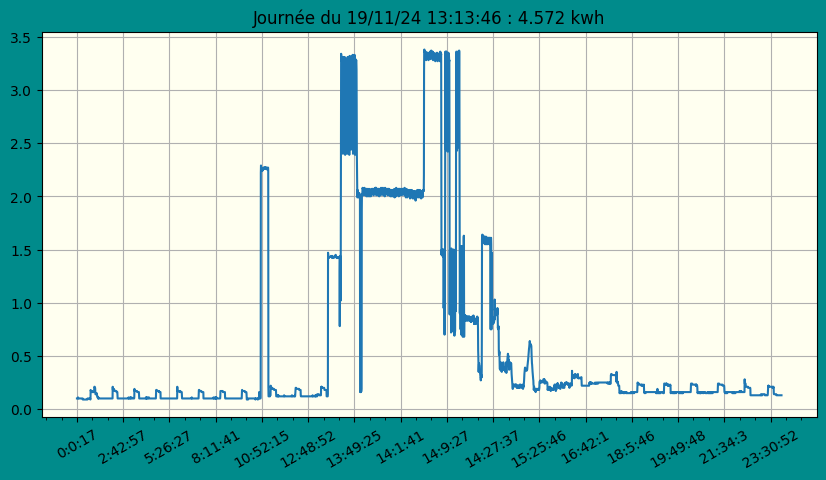

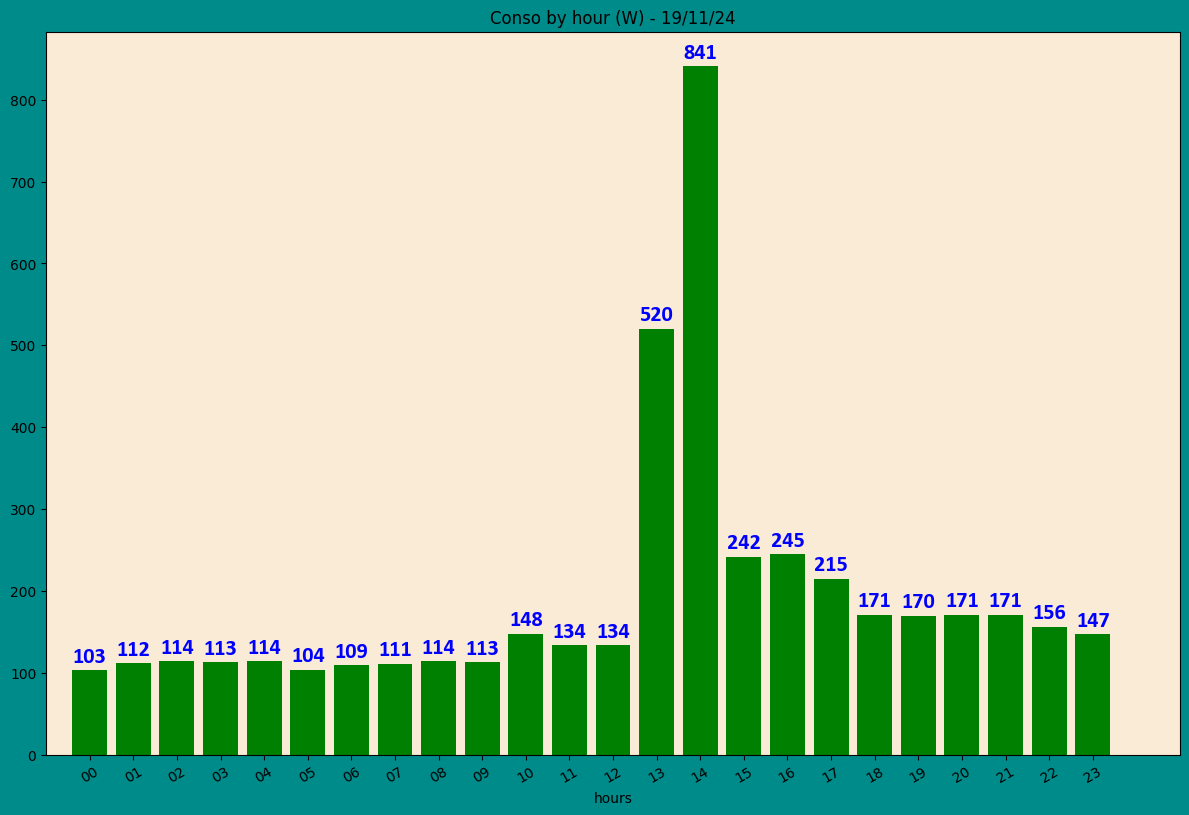

In [1204]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1205]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19     163     163    NaN   NaN
         20     284     447  121.0   NaN
         21     129     576 -155.0   NaN
         22     130     706    1.0   NaN
         23     131     837    1.0   NaN
...             ...     ...    ...   ...
22/11/24 09     105    1145   -1.0  10.0
         10     178    1323   73.0  11.0
         11     133    1456  -45.0  12.0
         12     224    1680   91.0  13.0
         13      29    1709 -195.0  14.0

[11011 rows x 4 columns]

In [1206]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,103,103,NaN,NaN
01,112,215,9.0,NaN
02,114,329,2.0,NaN
03,113,442,-1.0,NaN
04,114,556,1.0,NaN
05,104,660,-10.0,NaN
06,109,769,5.0,NaN
07,111,880,2.0,NaN
08,114,994,3.0,NaN


In [1207]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

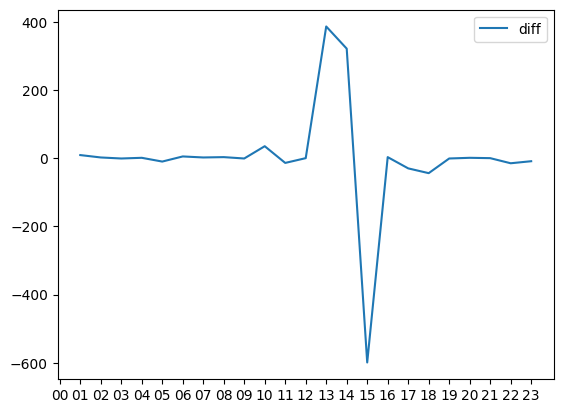

In [1208]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

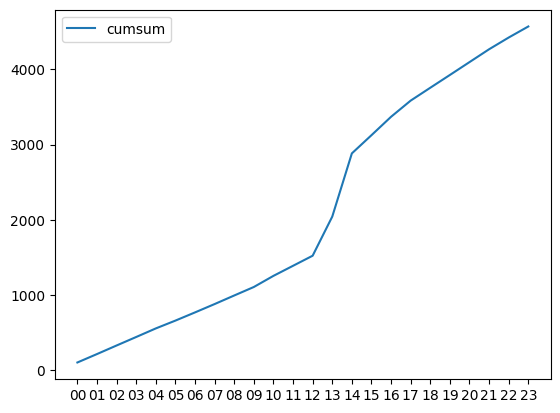

In [1209]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [1210]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB